In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore



ImportError: cannot import name 'zscore' from 'scipy.stats' (unknown location)

In [72]:
data=pd.read_csv('./googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print(data.shape)

(10841, 13)


In [6]:
#missing data 
def missingValues(df):
     return df.isnull().sum()

print(missingValues(data))



App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [7]:
#for App
#data['App'].unique()
data[data['App'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [8]:
#check for category
data['Category'].unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
##1.9 is a value that need to be cleaned
print(data[data['Category']=='1.9'])
print('---------------------')
data['Category']=data['Category'].replace('1.9',data['Category'].mode()[0])
data['Category'].unique()

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
---------------------


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
#dealing with null values for rating
data['Rating'].describe()


count    10841.000000
mean         4.194244
std          0.499563
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64

In [16]:
data['Rating'].unique()


array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [17]:
mean_val=data['Rating'].mean()
data['Rating']=round(data['Rating'].replace(np.nan,mean_val),1)
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [18]:
data['Rating']=data['Rating'].fillna(mean_val)
data['Rating'].isnull().sum() #count returns the non null entries


0

In [39]:
#19 here is outlier so we need to fix it  the range is from 1 to 5
#threshold here is 5
#data.dtypes
#data.Rating = data.Rating.astype(float)
threshold = 5.0
#filter and replace 
data['Rating'] = np.where(data['Rating'] <=threshold, data['Rating'], threshold)



In [40]:
data.Rating.describe()

count    10841.000000
mean         4.192953
std          0.478956
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [41]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [73]:
#dealing with null values for size

data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [76]:
#deal with anonymous values
data[data['Size']=='Varies with device']='50M'#replace it with default value
# if(',' in data['Size'])://this removes the , between the cells
#     data['Size']=data[data['Size'].replace(',','')]
data['Size'] = data['Size'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

print(data['Size'].unique())

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' '50M' '9.4M' '15M' '10M'
 '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M'
 '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M' '3.9M' '2.9M' '38M' '32M'
 '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M' '6.7M' '30M' '2.6M'
 '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M' '8.2M' '9.9M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '7.2M' '2.1M' '42M'
 '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M'
 '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M'
 '66M' '79k' '8.4M' '118k' '44M' '695k' '1.6M' '6.2M' '18k' '53M' '1.4M'
 '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '4.8M' '70M'
 '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M' '97M' '2.0M' '1.9M' '1.8M'
 '5.3M' '47M' '556k' '526k' '76M' '7.6M' '59M' '9.7M' '

In [86]:

data['Size'] = data['Size'].apply(lambda x: float(str(x)[:-1]) * (1000 if str(x)[-1]== 'K' else 1e6 if str(x)[-1] == 'M' else 1))
data.Size.unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07, 5.00e+07,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+02,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

In [90]:

#check for nulls
data.Size.isna().sum()



0

In [91]:
data.Size.describe()


count    1.084100e+04
mean     2.595487e+07
std      2.319862e+07
min      8.000000e+00
25%      5.900000e+06
50%      1.800000e+07
75%      5.000000e+07
max      1.000000e+08
Name: Size, dtype: float64

In [93]:
#check for  outliers
Q1 = data['Size'].quantile(0.25)
Q3 = data['Size'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Size'] < lower_bound) | (data['Size'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


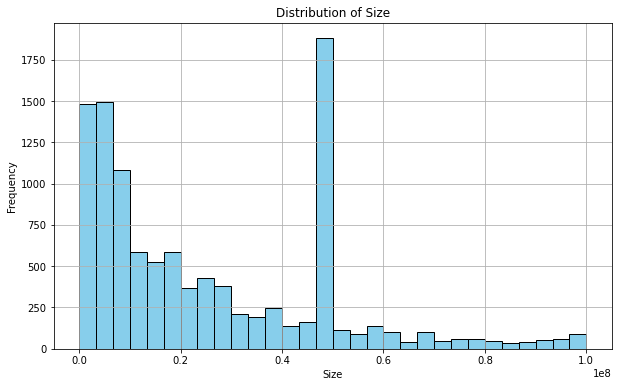

In [96]:
#visualizations of the distribution of values
plt.figure(figsize=(10, 6))
plt.hist(data['Size'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

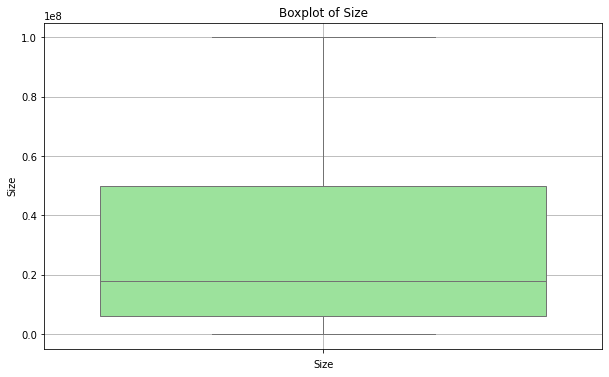

In [102]:
#visualize outliers using boxplot

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data['Size'], color='lightgreen')
plt.title('Boxplot of Size')
plt.xlabel('Size')
plt.grid(True)
plt.show()



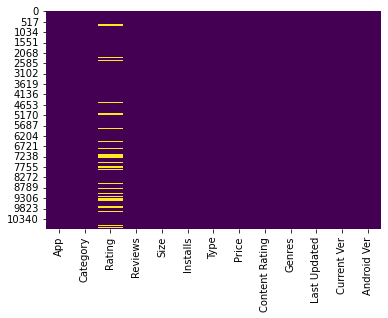

In [115]:
#heatmap 
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')  # data is your DataFrame
plt.show()

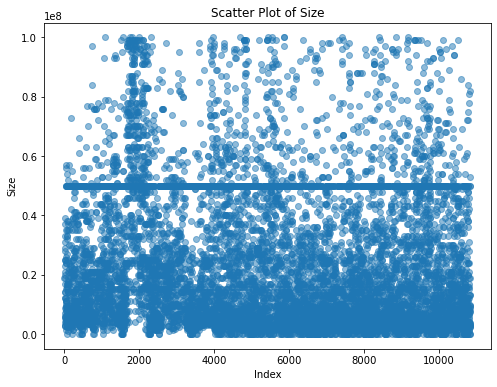

In [105]:
#scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data.index, data['Size'], alpha=0.5)
plt.title('Scatter Plot of Size')
plt.xlabel('Index')
plt.ylabel('Size')
plt.show()


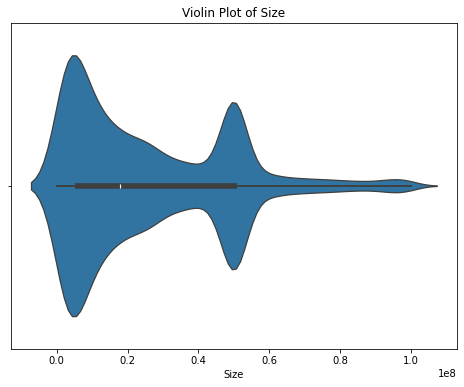

In [106]:
#violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x=data['Size'])
plt.title('Violin Plot of Size')
plt.xlabel('Size')
plt.show()


In [107]:
#z-score plot
# Calculate z-scores for outlier detection
data['z_score'] = zscore(data['Size'])

# Plot Z-scores
plt.figure(figsize=(8,6))
plt.scatter(data.index, data['z_score'], alpha=0.5)
plt.axhline(3, color='r', linestyle='--', label='Outlier threshold (z > 3)')
plt.axhline(-3, color='r', linestyle='--', label='Outlier threshold (z < -3)')
plt.title('Z-Score Plot of Size')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


NameError: name 'zscore' is not defined

C:\Users\Aya Atef\AppData\Local\Temp\ipykernel_17052\2612011403.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Size'], shade=True)


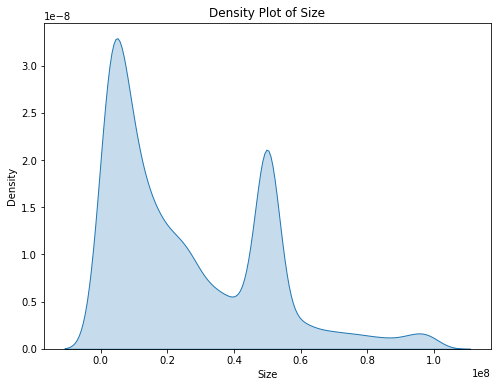

In [108]:
#density plot
plt.figure(figsize=(8,6))
sns.kdeplot(data['Size'], shade=True)
plt.title('Density Plot of Size')
plt.xlabel('Size')
plt.ylabel('Density')
plt.show()


In [95]:
#Reviews column
data.Reviews.describe()

count     10841
unique     4682
top         50M
freq       1695
Name: Reviews, dtype: object

In [116]:

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

0

In [119]:
data.Reviews.isna().sum()

1696

In [125]:
mid=data.Reviews.median()
data.Reviews.fillna(mid)

742.0


0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       742.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [126]:
data.Reviews.isna().sum()

1696

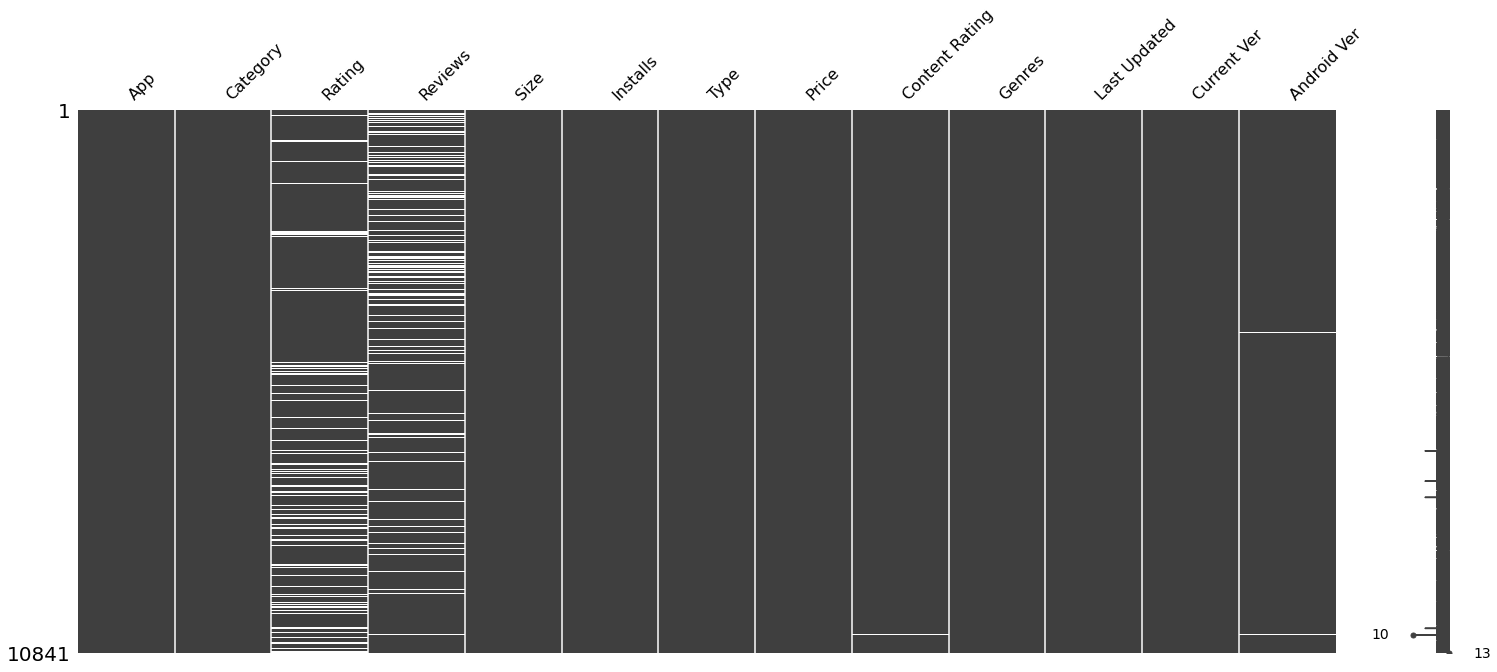

In [ ]:
msno.matrix(data)
plt.show()


In [128]:
data.Reviews.describe()

count    9.145000e+03
mean     2.490487e+05
std      1.716211e+06
min      0.000000e+00
25%      2.200000e+01
50%      7.420000e+02
75%      2.503700e+04
max      4.489389e+07
Name: Reviews, dtype: float64

In [131]:
data.Reviews.tail

<bound method NDFrame.tail of 0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839         NaN
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64>

In [ ]:
#detect interactions among attributes

In [11]:
#installs attribute
data['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [71]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [72]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [73]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [74]:
data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [75]:
data['Last Updated'].unique()#it needs feature engineering like feature splitting 

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [76]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [77]:
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
#find dublicates
data.isnull().sum()/data.shape[0]*100
#to find if there is a percentage bigger than one

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.009224
Price             0.000000
Content Rating    0.009224
Genres            0.000000
Last Updated      0.000000
Current Ver       0.073794
Android Ver       0.027673
dtype: float64

In [ ]:
data.duplicated().sum()
#correlation efficient value is for numeric data and removes duplicates


483

In [96]:
data=data.drop_duplicates()

In [97]:
data.duplicated().sum()

0

In [83]:
#identifying garbage values
for i in data.select_dtypes(include='object').columns:
    print(data[i].value_counts())

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPH

In [ ]:
#Exploratory data analysis(EDA)

In [86]:
#descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10841.0,4.194244,0.499563,1.0,4.1,4.2,4.5,19.0


In [ ]:
#histogram to understand the distribution
for i in data.select_dtypes(include='number').columns:
          sns.histplot(data,x=i)
          plt.show()

NameError: name 'sns' is not defined

In [ ]:
#handle the relationships between data

In [ ]:
from sklearn.impute import KNNImputer
impute=KNNImputer()
for i in data.select_dtypes (include='number').columns:
    data[i]=impute.fit_transform(data[[i]])

In [ ]:
#visualization

In [ ]:
#data binning for noisy data